In [ ]:
# install yahoo finance and other modules if not installed before
#%pip install yfinance
#%pip install matplotlib

[*********************100%***********************]  1 of 1 completed


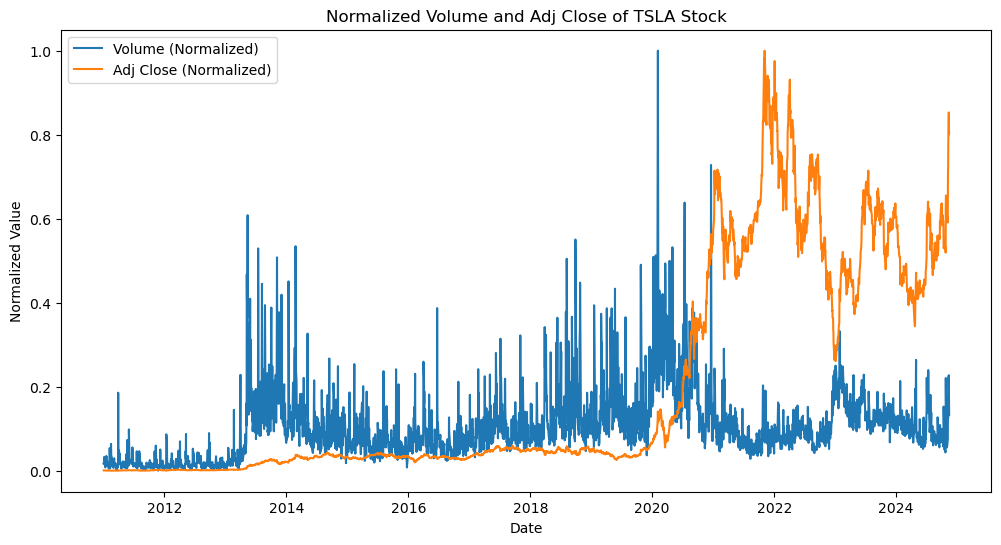

In [1]:
import yfinance as yf  
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Get the stock data specifying the stock ticker, start date, and end date
startDate = '2011-01-01'
endDate = datetime.today().strftime('%Y-%m-%d')
#endDate = '2020-01-01'
data = yf.download(['TSLA'], startDate, endDate)

# Normalize the 'Volume' and 'Adj Close' columns
scaler = MinMaxScaler()
data[['Volume', 'Adj Close']] = scaler.fit_transform(data[['Volume', 'Adj Close']])

# Plot the 'Volume' and 'Adj Close' columns on a normalized Y axis
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volume'], label='Volume (Normalized)')
plt.plot(data.index, data['Adj Close'], label='Adj Close (Normalized)')
plt.title('Normalized Volume and Adj Close of TSLA Stock')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

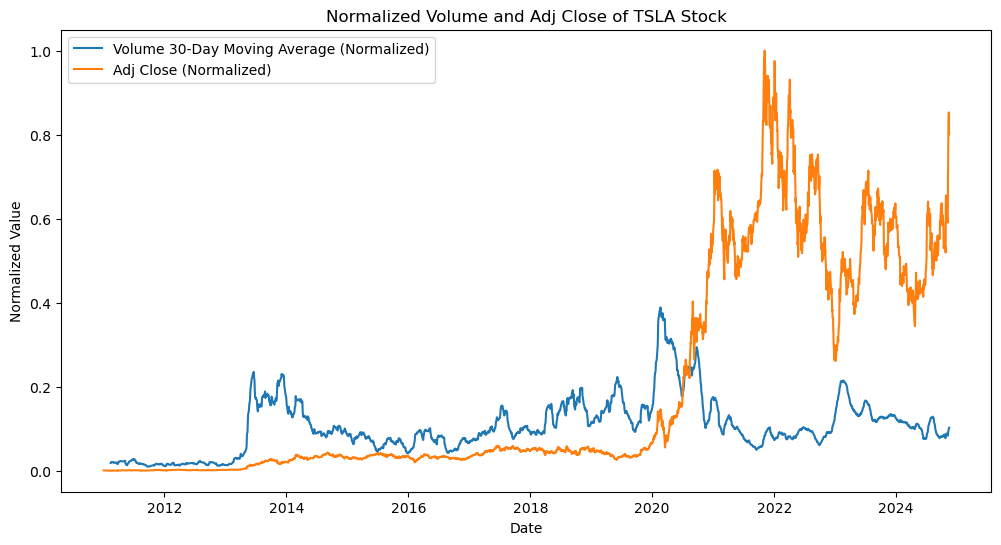

In [2]:
# Calculate 30-day moving average for 'Volume'
data['Volume_MA'] = data['Volume'].rolling(window=30).mean()

# Plot the 'Volume' and 'Adj Close' columns on a normalized Y axis
plt.figure(figsize=(12, 6))
#plt.plot(data.index, data['Volume'], label='Volume (Normalized)')
plt.plot(data.index, data['Volume_MA'], label='Volume 30-Day Moving Average (Normalized)')
plt.plot(data.index, data['Adj Close'], label='Adj Close (Normalized)')
plt.title('Normalized Volume and Adj Close of TSLA Stock')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()